## Checking the Inter-Rater data has been preprocessed correctly

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from twaidata.MRI_preprep.io import load_nii_img
from twaidata.mri_dataset_directory_parsers.MSS3_multirater import MSS3MultiRaterDataParser
from twaidata.mri_dataset_directory_parsers.LBC_multirater import LBCMultiRaterDataParser
from tqdm import tqdm

In [47]:
img = load_nii_img("/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/imgs/MSS3_ED_003_wmhes.nii.gz")



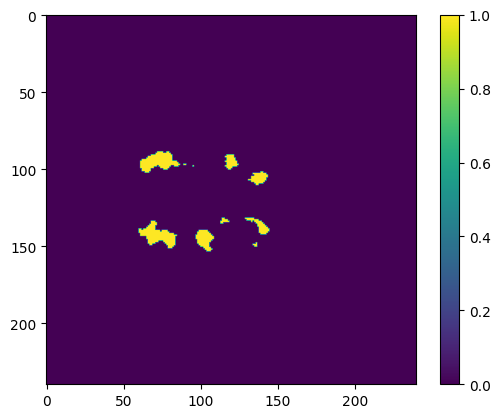

In [50]:
plt.imshow(img[0][:,:,30])
plt.colorbar()

In [2]:
parser = MSS3MultiRaterDataParser(
        # paths on the cluster for the in house data
        "/home/s2208943/ipdis/data/InterRater_data",
        "/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData"
    )
    
iomap = parser.get_dataset_inout_map()
for key, value in iomap.items():
    print("individual: ", key)
    print("individual map:", value)
    print(value.keys())
    break

individual:  MSS3_ED_025
individual map: {'FLAIR': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_FLAIRbrain.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/imgs', 'outfilename': 'MSS3_ED_025_FLAIR', 'islabel': False}, 'wmhes': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_WMH_mask_ES.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/labels', 'outfilename': 'MSS3_ED_025_wmhes', 'islabel': True}, 'T1': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_T1Wbrain_seg.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/imgs', 'outfilename': 'MSS3_ED_025_T1', 'islabel': False}, 'lacune': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_lacunes.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/labels', 'outfilenam

In [60]:
def visualise_rater_files(name, filemap, colorbar=False):
    print("-------")
    print(name)
    num_imgs = len(filemap.keys())
    
    def get_img(key):
        try:
            return load_nii_img(os.path.join(filemap[key]['outpath'], filemap[key]['outfilename'] + ".nii.gz"))[0]
        except:
            print(f"failed for {key}")
            return None
    
    imgs = {key: get_img(key) for key in tqdm(filemap.keys())}
    
    fig, axs = plt.subplots(3, num_imgs, figsize=(20, 10))
    
    print(imgs.keys())
    # print(imgs)
    num_slices = imgs['FLAIR'].shape[-1]
    islices = [num_slices // 4, num_slices // 2, (num_slices // 4) * 3]
    for i in range(3):
        for j, key in enumerate(imgs.keys()):
            ax = axs[i][j]
            if imgs[key] is not None:
                im = ax.imshow(imgs[key][:,:,islices[i]])
                if i == 0:
                    ax.set_title(key)
                if colorbar:
                    plt.colorbar(im, ax=ax)
                
    plt.show()
    plt.clf()

-------
LBC1921_21746


 43%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                                    | 3/7 [00:00<00:00, 17.64it/s]

failed for ICV


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.73it/s]


dict_keys(['FLAIR', 'ICV', 'T1', 'wmh1', 'wmh2', 'wmh4', 'wmh5'])


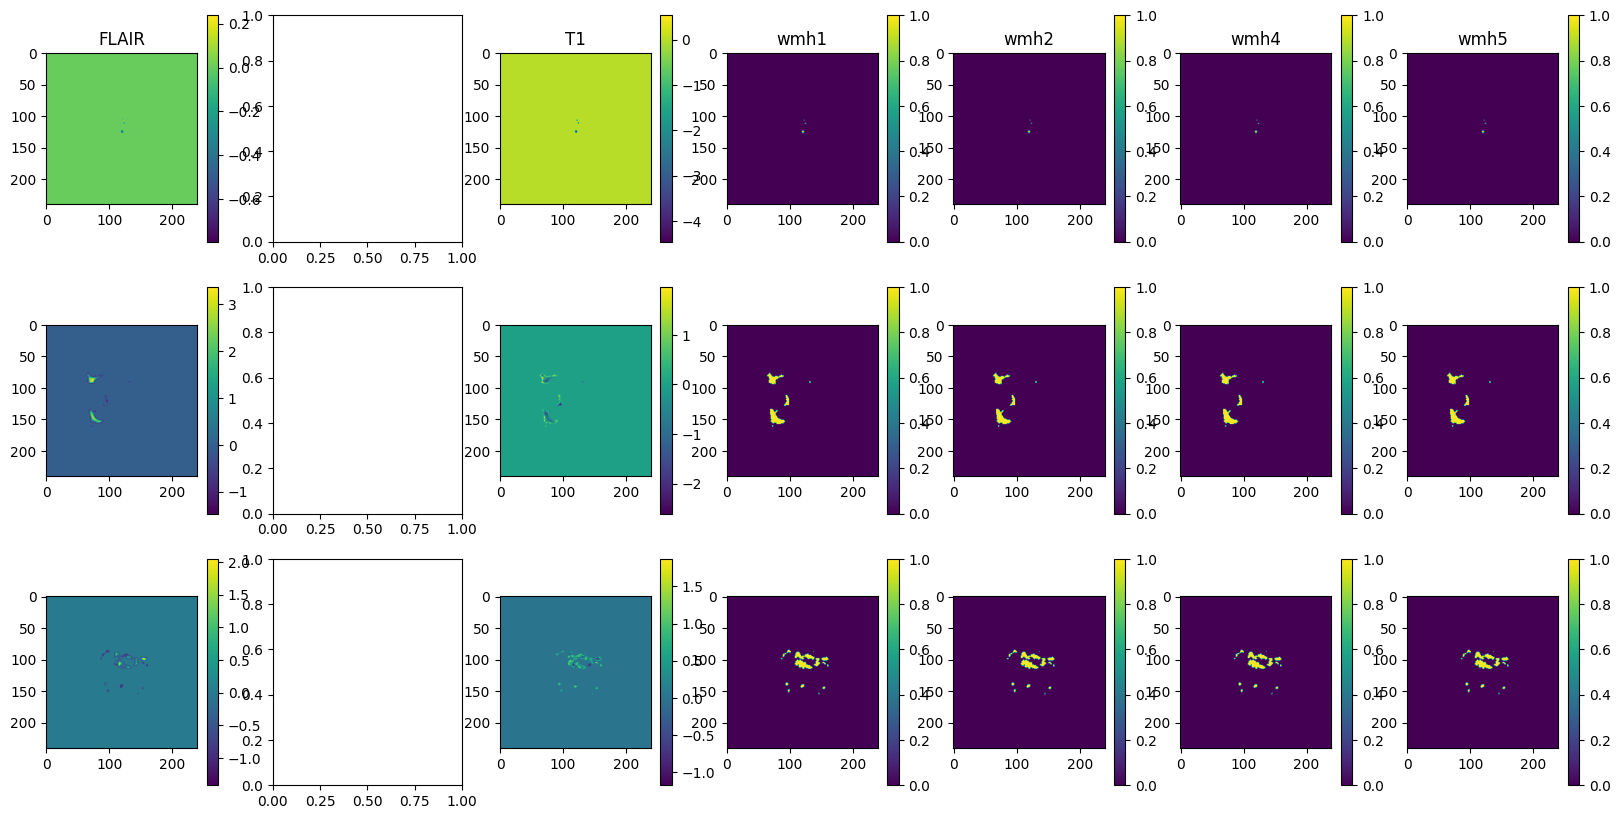

In [ ]:
for ind, filemap in iomap.items():
    visualise_rater_files(ind, filemap, colorbar=True)
    input()
    break

### problems that I have found:
bet does not work properly at all, see MSS3_ED_041. if this continues I will need to switch to pyrobex

remembre tha tthe WMH challenge test dataset has multiple raters!!! If I want to make a paper out of it you know...

The ICV is completely broken for the LBC data, it needs to be ignored, and I need to switch to pyrobex

In [21]:
imgs.keys()

dict_keys(['FLAIR', 'wmhes', 'T1', 'lacune', 'wmhmvh'])

In [42]:
parser = LBCMultiRaterDataParser(
        # paths on the cluster for the in house data
        "/home/s2208943/ipdis/data/InterRater_data",
        "/home/s2208943/ipdis/data/preprocessed_data/LBC_InterRaterData"
    )
    
iomap = parser.get_dataset_inout_map()

-------
LBC1921_21746


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00, 19.02it/s]


-------
LBC1921_21075


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00, 19.46it/s]


-------
LBC360386


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]


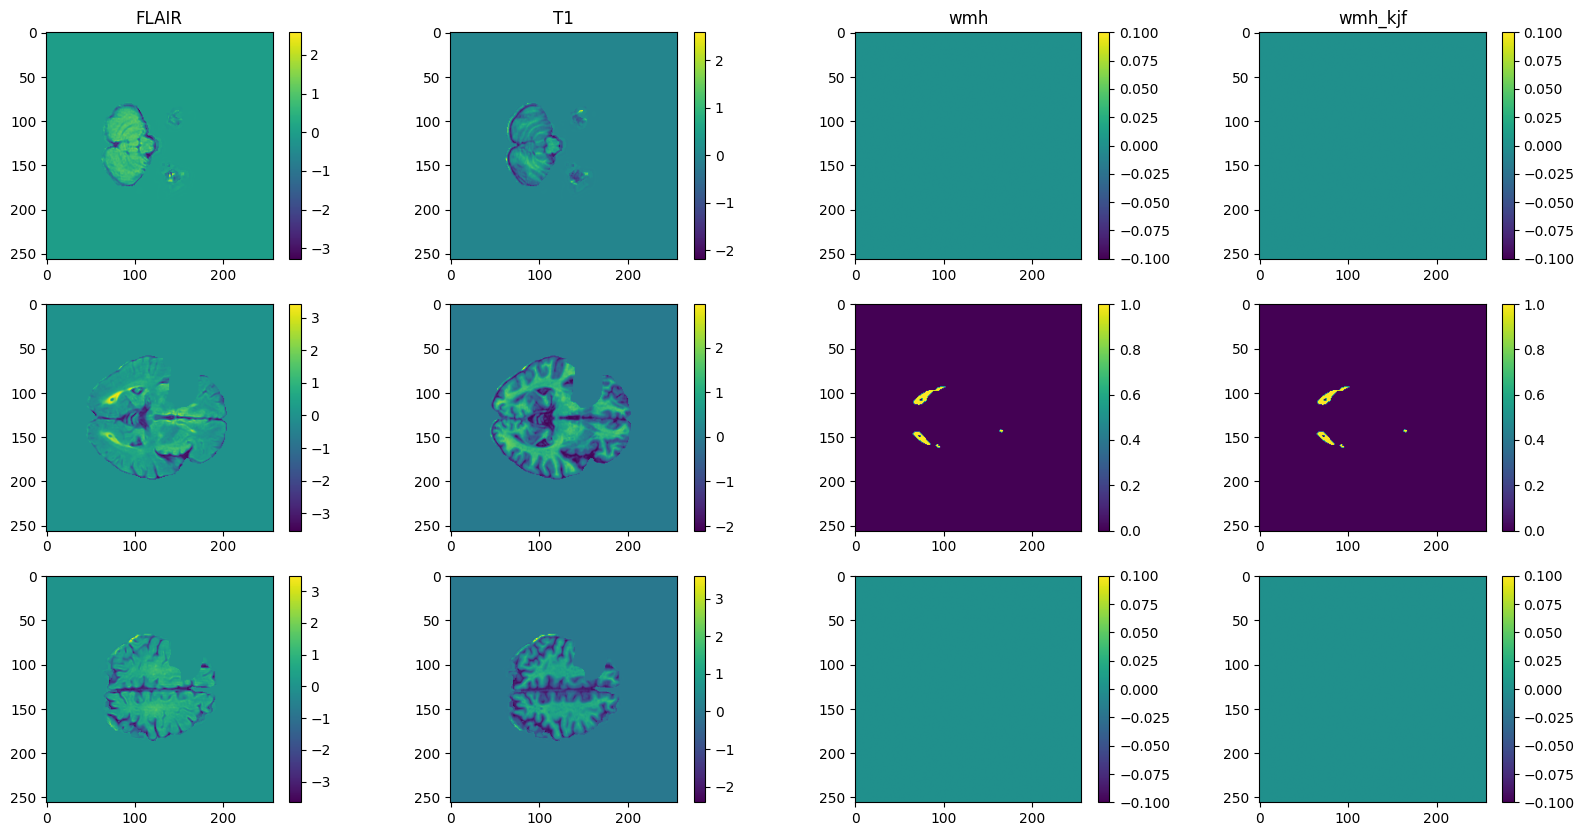

-------
LBC360188


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.14it/s]


<Figure size 640x480 with 0 Axes>

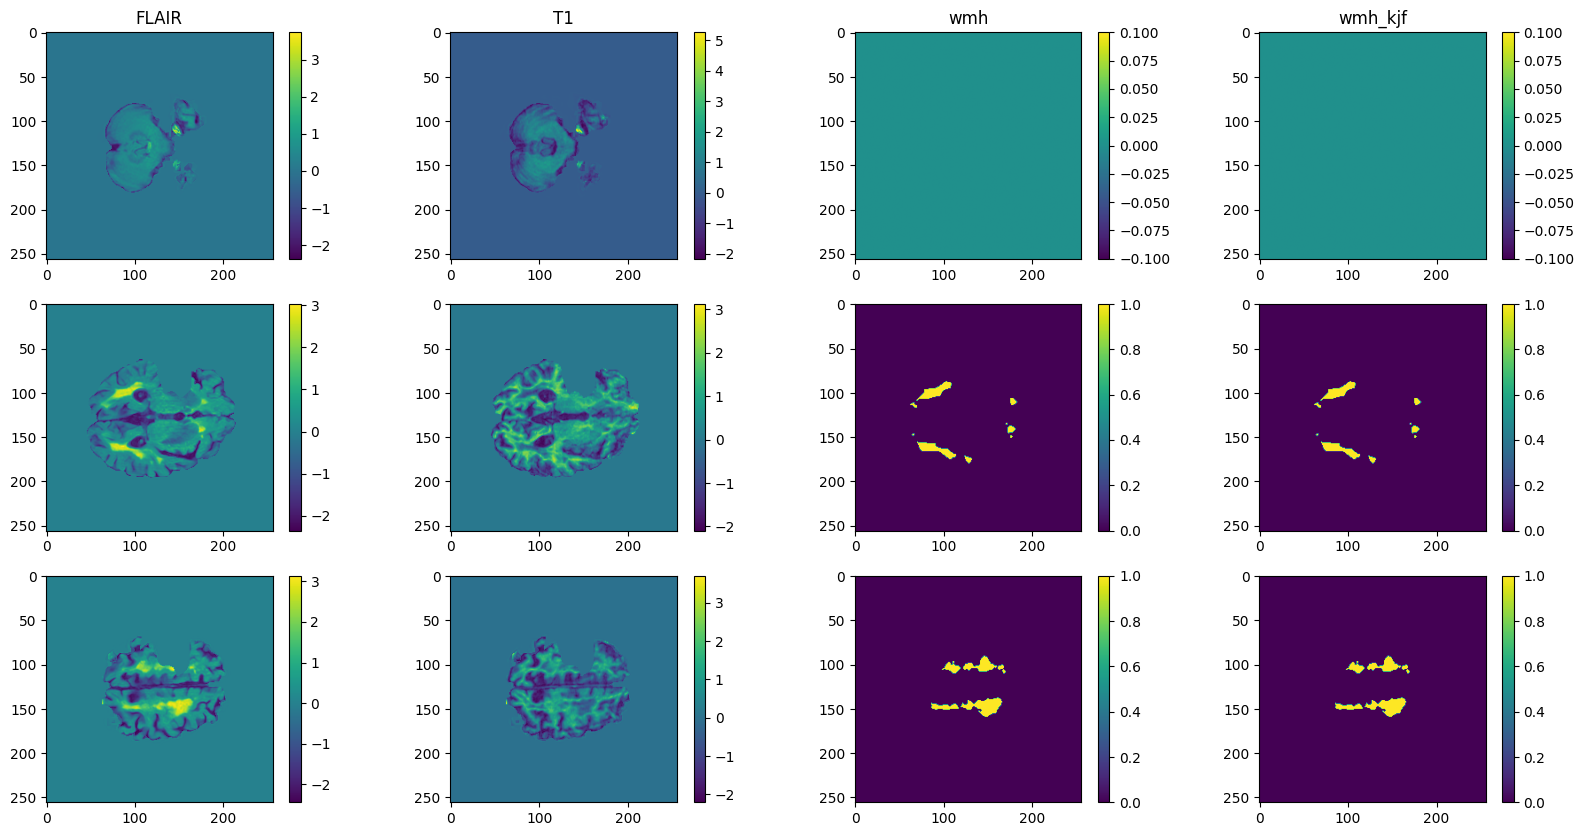

-------
LBC360085


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.51it/s]


<Figure size 640x480 with 0 Axes>

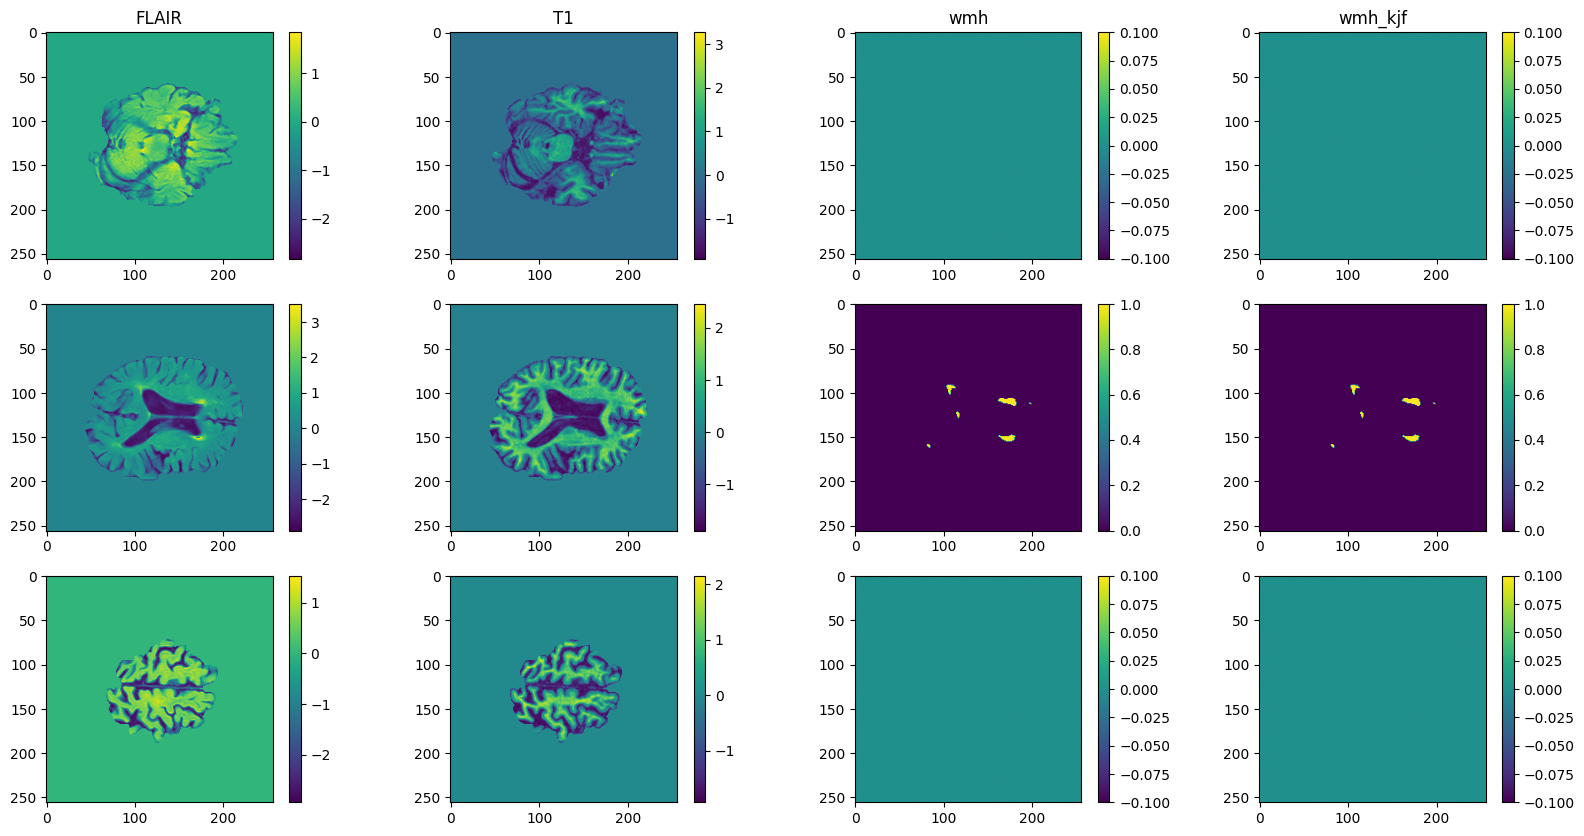

-------
LBC1921_21227


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00,  7.91it/s]


-------
LBC1921_21320


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00,  8.19it/s]


-------
LBC360435


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.84it/s]


<Figure size 640x480 with 0 Axes>

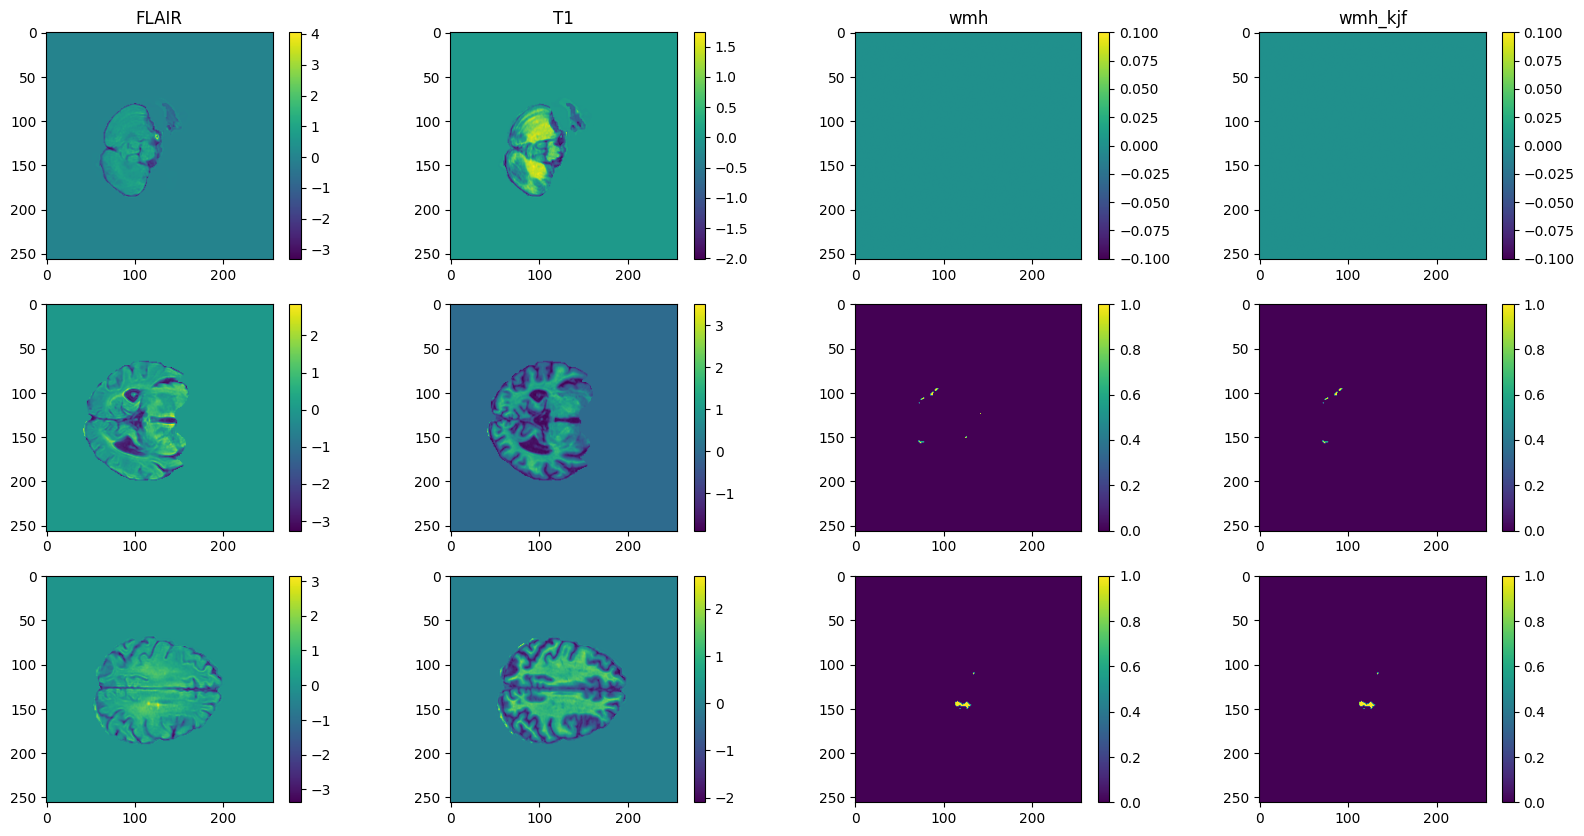

-------
LBC360172


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.57it/s]


<Figure size 640x480 with 0 Axes>

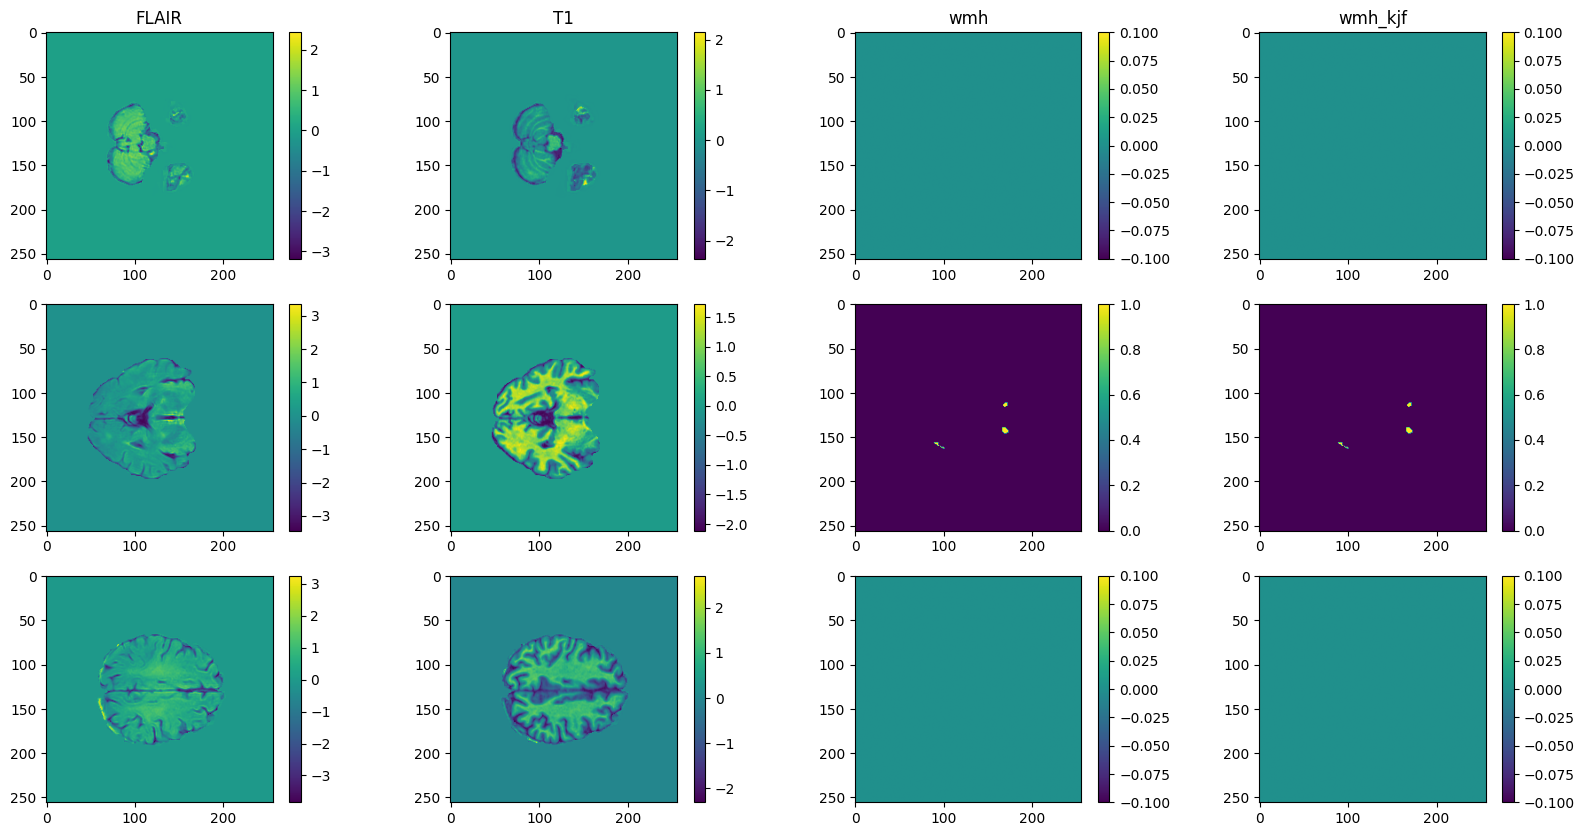

-------
LBC360301


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.02it/s]


<Figure size 640x480 with 0 Axes>

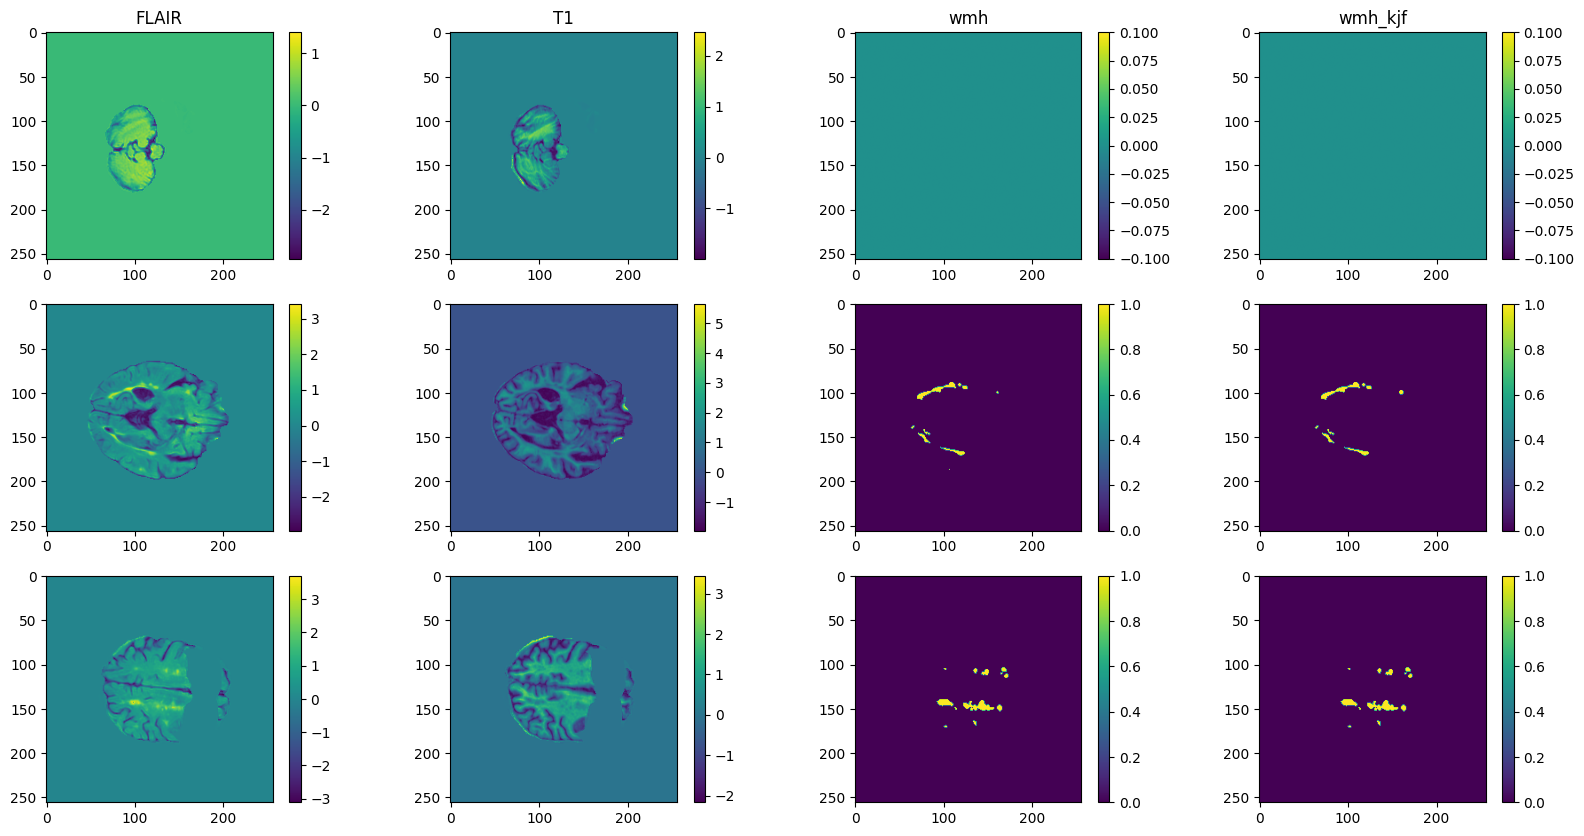

-------
LBC361185


  0%|                                                                                                                                                                                                                   | 0/4 [00:00<?, ?it/s]


-------
LBC360185


  0%|                                                                                                                                                                                                                   | 0/4 [00:00<?, ?it/s]


-------
LBC360381


  0%|                                                                                                                                                                                                                   | 0/4 [00:00<?, ?it/s]


-------
LBC360262


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.74it/s]


<Figure size 640x480 with 0 Axes>

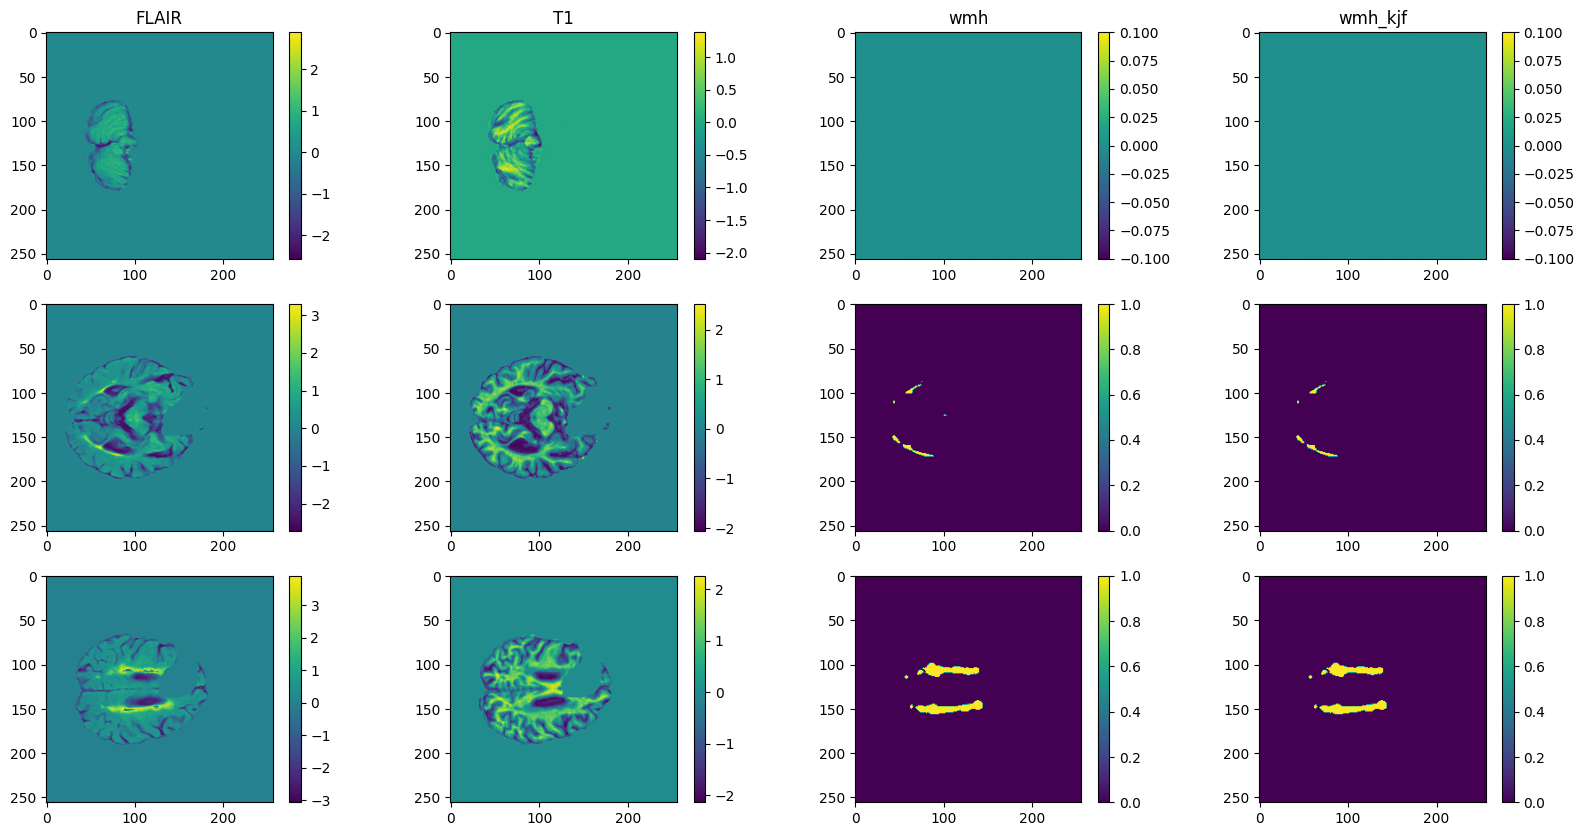

-------
LBC360286


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.52it/s]


<Figure size 640x480 with 0 Axes>

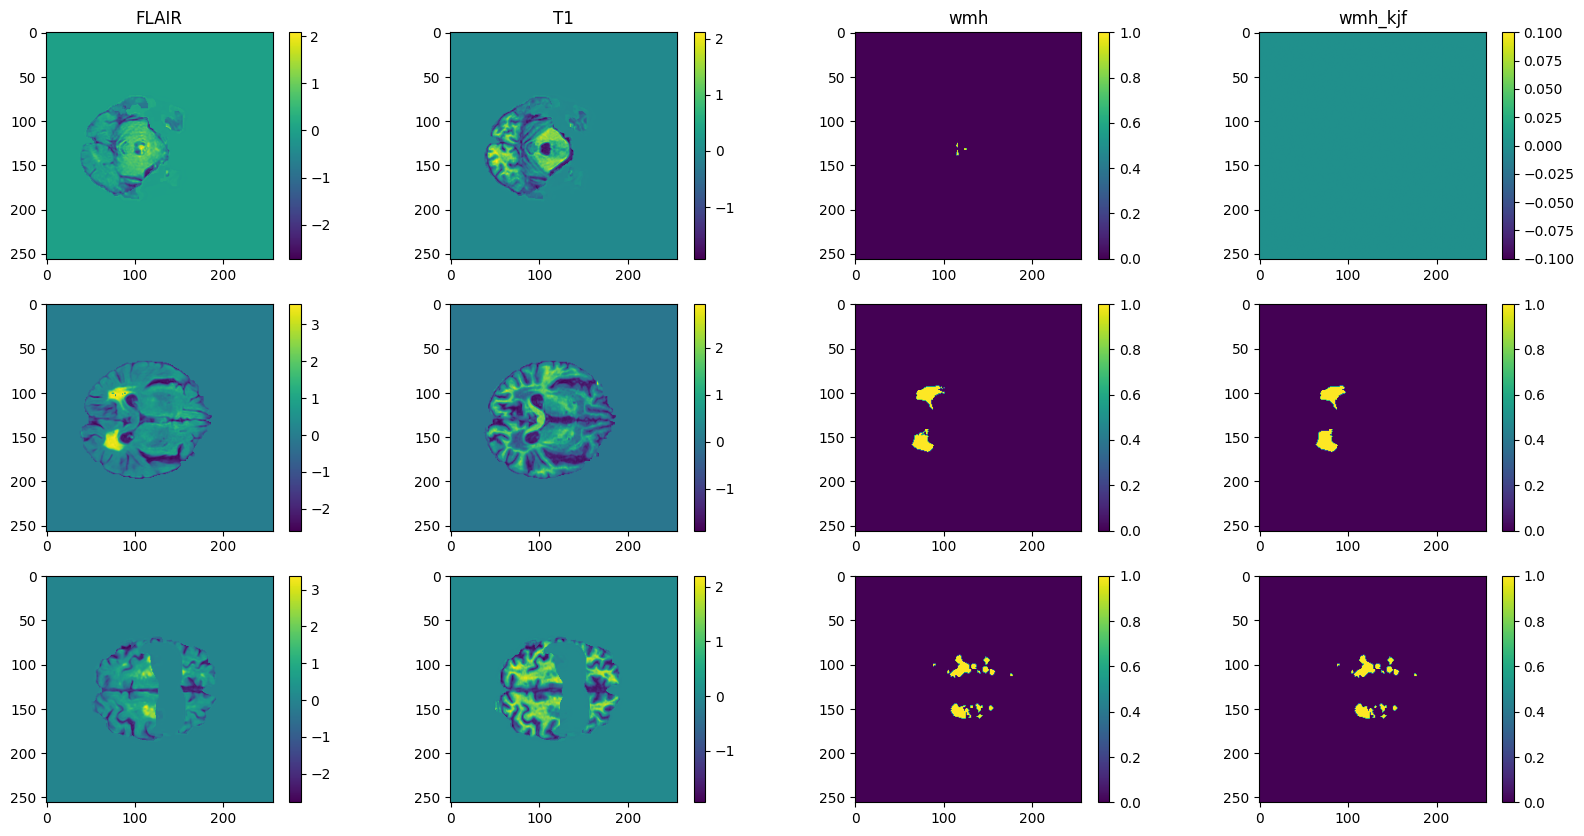

-------
LBC360510


  0%|                                                                                                                                                                                                                   | 0/4 [00:00<?, ?it/s]


-------
LBC1921_21171


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00,  7.35it/s]


-------
LBC1921_20930


 17%|█████████████████████████████████▊                                                                                                                                                                         | 1/6 [00:00<00:00, 12.55it/s]


-------
LBC1921_20947


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00,  8.11it/s]


-------
LBC1921_21039


 17%|█████████████████████████████████▊                                                                                                                                                                         | 1/6 [00:00<00:00, 11.54it/s]


-------
LBC360361


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.21it/s]


<Figure size 640x480 with 0 Axes>

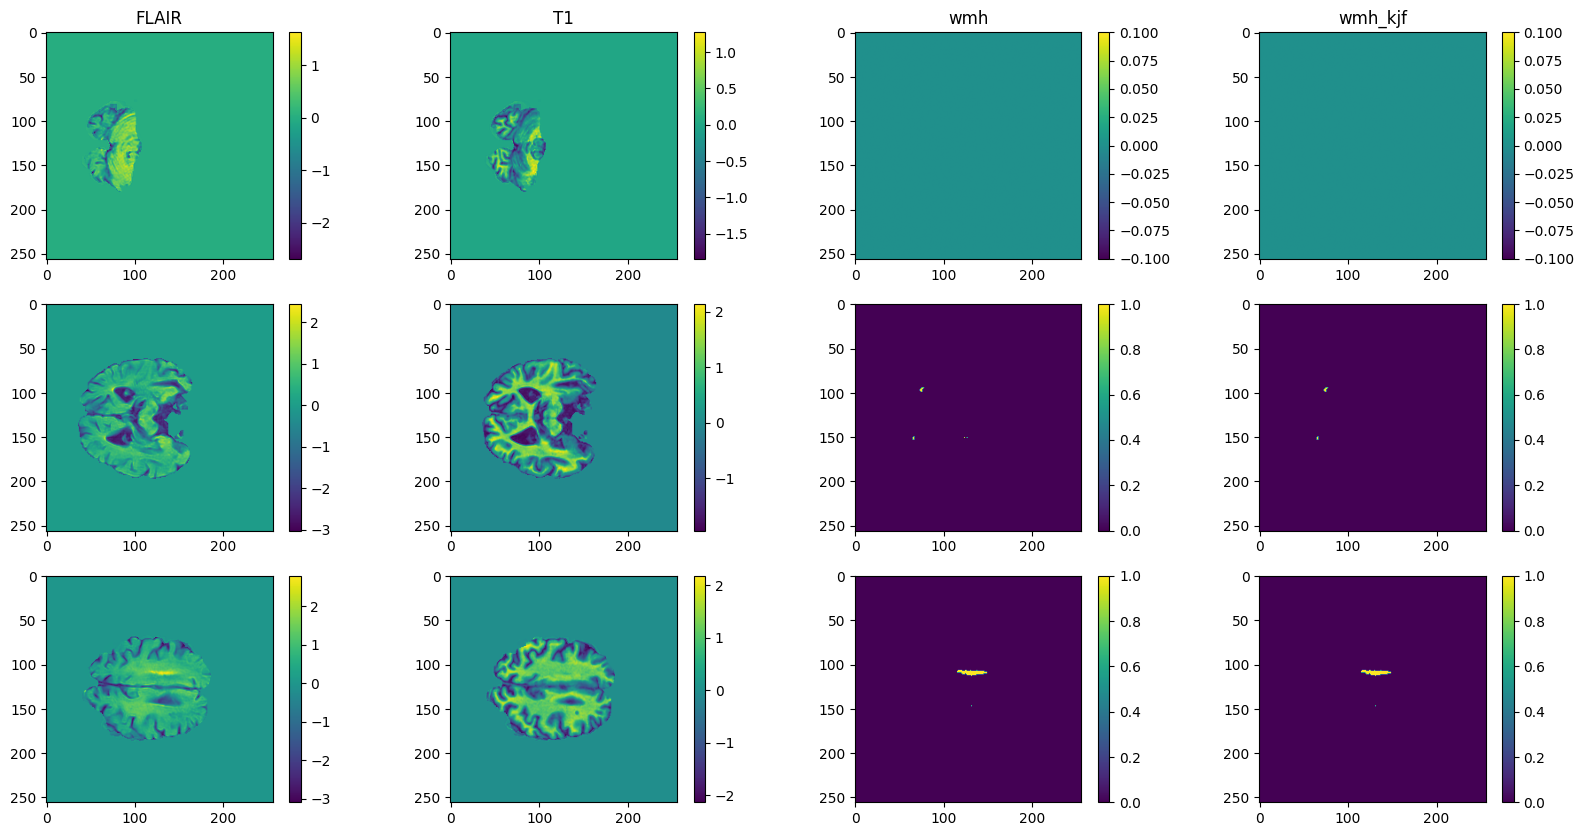

-------
LBC1921_21012


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00,  9.04it/s]


-------
LBC1921_21311


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00,  8.26it/s]


-------
LBC1921_21840


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00,  8.42it/s]


-------
LBC1921_21763


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00, 10.00it/s]


-------
LBC1921_21664


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00,  7.08it/s]


-------
LBC360375


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.27it/s]


<Figure size 640x480 with 0 Axes>

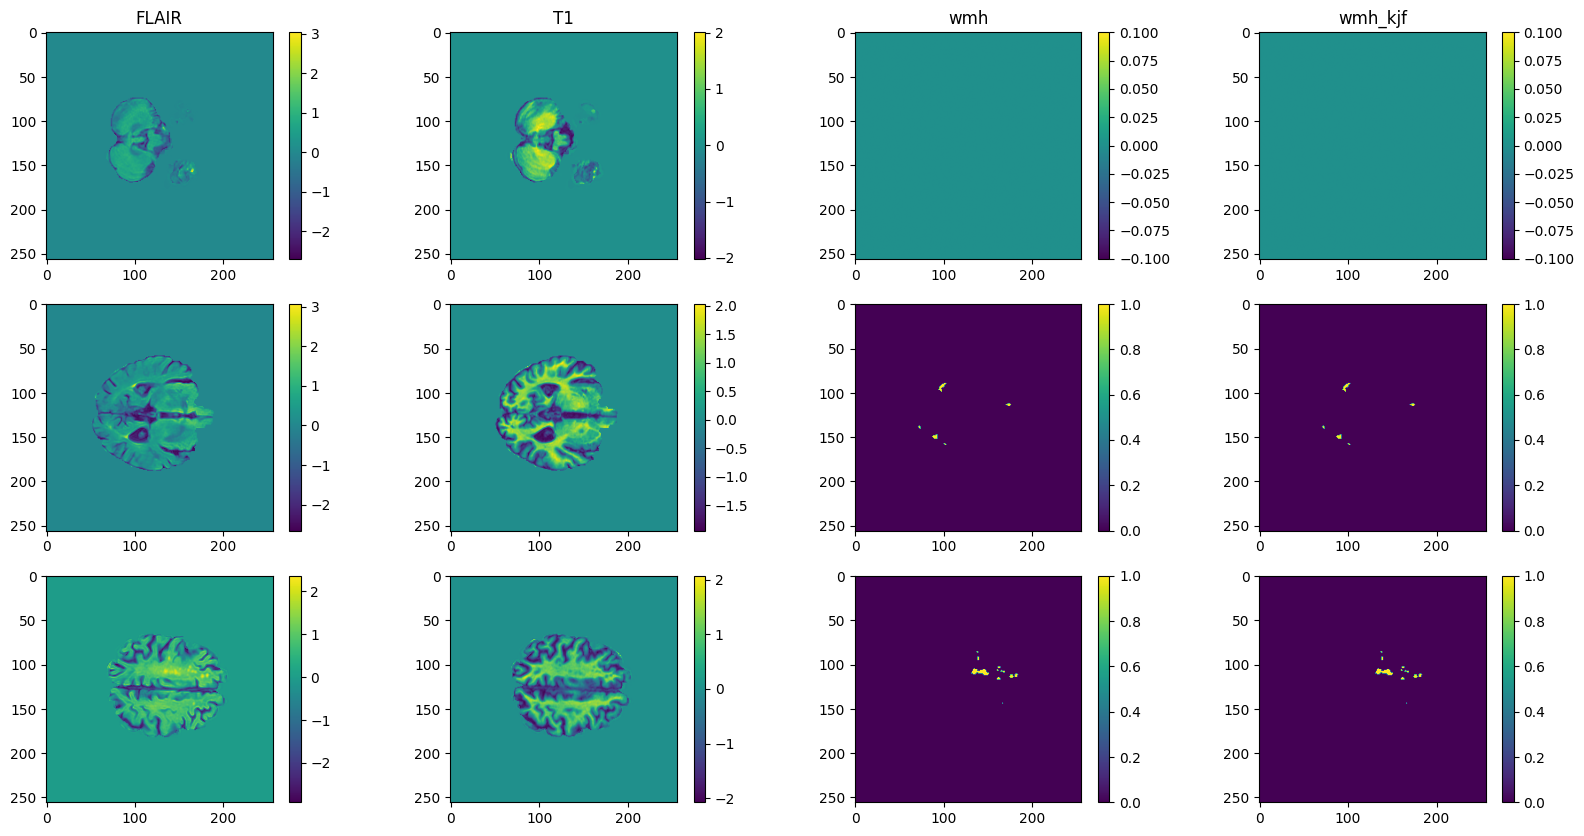

-------
LBC1921_21484


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00,  7.31it/s]


-------
LBC1921_21120


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00,  8.93it/s]


-------
LBC1921_20953


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:00<00:00, 11.55it/s]


-------
LBC360330


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.57it/s]


<Figure size 640x480 with 0 Axes>

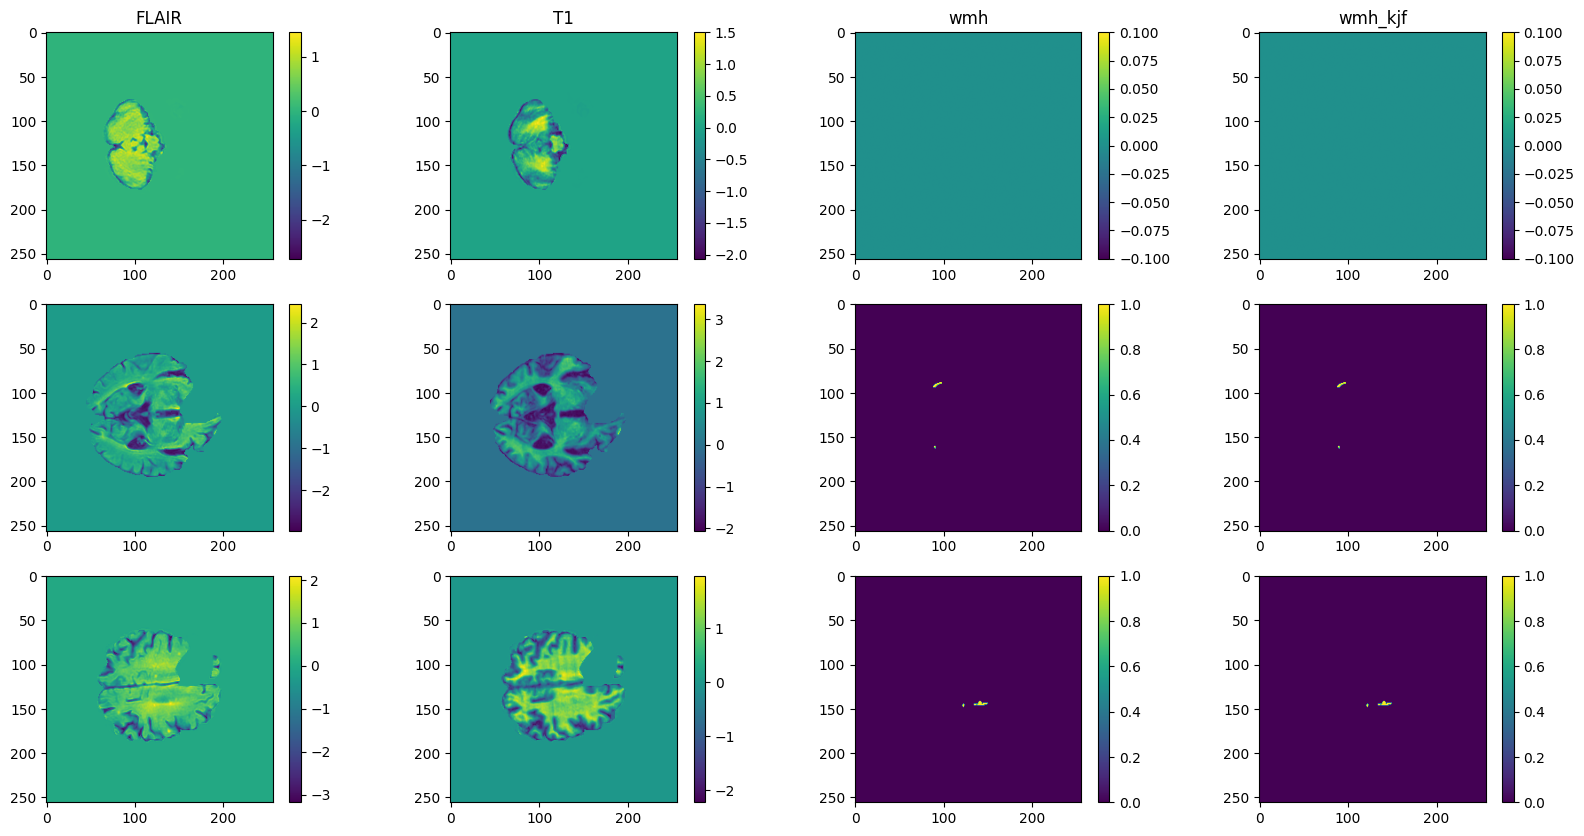

KeyboardInterrupt: Interrupted by user

<Figure size 640x480 with 0 Axes>

In [45]:
for ind, filemap in iomap.items():
    try:
        visualise_rater_files(ind, filemap, colorbar=True)
    except:
        continue
    input()
    # break